In [1]:
%pylab inline
from scipy.integrate import odeint  # the differential equation integrator
from matplotlib import animation    # animation package (for later)

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab 8 – Keplerian and Non-Keplerian Orbits

Today we will be looking at numerical solutions to the two-body problem.  We will work these problems in the center-of-mass frame of reference. As we often do in computing, we will first attempt a calculation to which we know the answer.  We will then attack a second problem that is more complex and cannot be solved analytically. We will start out by reducing the two-body problem to a one-body problem by solving for and plotting the motion of the *reduced mass* about the fixed center of mass of the system.  Later in the lab we will switch to plotting the motion of *both* bodies with a simple coordinate transform.  

Our trial case will be that of a Keplerian orbit (i.e. one obeying the $ 1/r^{2} $ force law of Newtonian gravity).  We will then try out non-Keplerian orbits that obey different force laws.  We will do all of our calculations today in a polar coordinate system.  


## Objectives

In this lab you will 
* model circular, elliptical and hyperbolic Keplerian orbits,
* visualize the motion of the two bodies with and without a movie,
* and model a non-Keplerian orbit.


## Circular Keplerian Orbit
### Setting the initial conditions and other physical parameters
#### Exercise 8.1 
Let's work in a unit system where $G = 1.0$.  If the two masses are $m_{1} = 5$ and $m_{2} = 1$ and they start at a separation of $r_{0} = 2.0$, fill in the rest of the constants and initial conditions such that the reduced mass will undergo a *circular* (Keplerian) orbit of radius 2.0 around the center of mass.

*Check your values with an instructor before proceeding.*

*Coding style tip: rather than doing any necessary calculations elsewhere (say, a piece of scratch paper), include those calculation in the cell block. This way, you'll have a record of what you did and it will be easy to reproduce the calculations for different values.*

In [2]:
# Initial conditions and constants
G_grav = 1 #FIX
r0 = 2. #FIX
phi0 = 0. #FIX
m1 = 5. #FIX
m2 = 1. #FIX

mu = (m1*m2)/(m1+m2) #FIX #Reduced mass
gamma_g = G_grav*m1*m2 #FIX #This is simply G*m1*m2. This combination would appear frequently in this lab.
ang_mom = sqrt(gamma_g*r0*mu) #FIX #Angular momentum. You should write this in terms of mu, G_grav, r0, m1, and m2.
drdt0 = 0. #FIX

## Numerical solution
#### Exercise 8.2 
First, solve the equations of motion numerically. Define a function that will return the derivatives for your 3 variables ($r$, $\dot{r}$, and $\phi$). Then, use  `odeint` to solve for \\(0 \leq t \ \leq 20 \\).  Include mu, gamma_g and ang_mom as parameters sent to 'odeint', similarly to how you did in labs 4 and 5.

In [3]:
# Derivative function
def deriv(f,t,param): # return derivatives of the array f[r,r',phi]
    # Unpack parameters
    mu_deriv = param[0]
    ang_mom_deriv = param[1]
    gamma_g_deriv = param[2]
    
    # Function values:
    r = f[0] #FIX
    drdt = f[1] #FIX
    phi = f[2] #FIX
    
    # Derivative definitions:
    dphidt = ang_mom_deriv/(mu_deriv*r**2) #FIX
    d2rdt2 = r*dphidt**2 - gamma_g_deriv/(mu_deriv*r**2) #FIX
    
    return [drdt, d2rdt2, dphidt]



In [4]:
# Integration of equations of motion
time = linspace(0, 20, 1000) #FIX
fInit = array([r0, drdt0, phi0]) #FIX
param = array([mu, ang_mom, gamma_g]) #FIX
fSoln = odeint(deriv, fInit, time, args=(param,))



#### Exercise 8.3 

Plot your results. Include plots of $r$, $\dot{r}$, and $\phi$ all as a function of time.  Be sure to label your plots and your axes.  ***Explain below why each of your plots displays the expected behavior.***
(double-click to enter text)   
In the r vs t graph, we have a horizontal line because the dr/dt is set at 0 and the radius is constant during the orbit.

In the dr/dt vs t graph, we have a horizontal line because the derivative of a constant is 0.

In the phi vs t graph, we see a sloped line because the planet is orbiting at a constant rate (thus phi is linear).
   
*Discuss any unexpected results with an instructor before moving on.*


Text(0, 0.5, 'angle (degrees)')

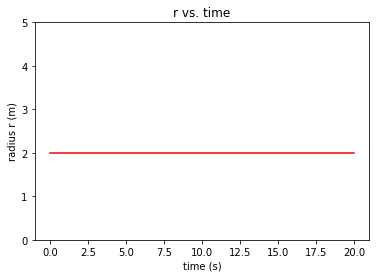

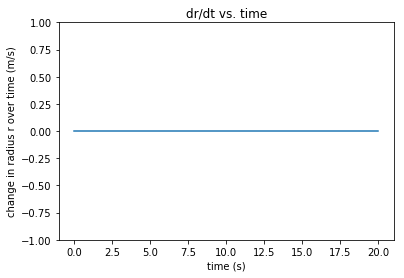

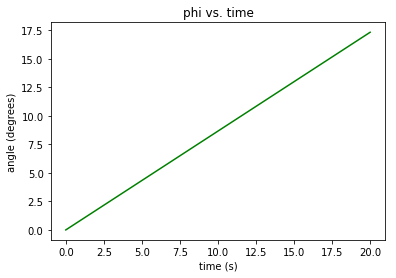

In [5]:
# Plots go here:
figure(1)
title("r vs. time")
plot(time, fSoln[:,0], "red")
xlabel("time (s)")
ylabel("radius r (m)")
ylim(0, 5)

figure(2)
title("dr/dt vs. time")
plot(time, fSoln[:,1])
xlabel("time (s)")
ylabel("change in radius r over time (m/s)")
ylim (-1, 1)

figure(3)
title("phi vs. time")
plot(time, fSoln[:,2], "green")
xlabel("time (s)")
ylabel("angle (degrees)")

#### Exercise 8.4 

Make a polar plot!

Look up some documentation on plotting in polar coordinates with python.  In particular, find examples of `pyplot.polar`, and make a polar plot of the orbital trajectory (i.e. $r(\phi)$) for the reduced mass about the center of mass.  


(0, 3)

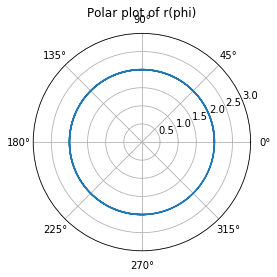

In [7]:
# Plots go here:
figure()
pyplot.polar(fSoln[:,2], fSoln[:,0])
title("Polar plot of r(phi)")
ylim(0, 3)

## An elliptical orbit

#### Exercise 8.5
Go through the same set of steps as above in Exercises 8.1 - 8.4 but with a set of initial conditions that will produce an *elliptical* orbit with an eccentricity of 0.8 and a perihelion distance (r$_{min}$) of 2.0.  (You should use the same masses and gravitational constant from Exercise 1.1.) 

*Hint: You might need to integrate over a larger time interval to obtain a closed orbit than in Exercise 7.2.*

*Hint: Remember, there is no need to copy over your deriv function again.*

In [8]:
# Initial conditions and constants
G_grav = 1 #FIX
r0 = 2. #FIX
phi0 = 0. #FIX
m1 = 5. #FIX
m2 = 1. #FIX
eccentricity = 0.8
r_min = 2.0

mu = (m1*m2)/(m1+m2) #FIX #Reduced mass
gamma_g = G_grav*m1*m2 #FIX #This is simply G*m1*m2. This combination would appear frequently in this lab.
ang_mom = sqrt(gamma_g*r_min*mu*(1+eccentricity)) #FIX #Angular momentum. You should write this in terms of mu, G_grav, r0, m1, and m2.
drdt0 = 0. #FIX

In [14]:
# Integration of equations of motion
time = linspace(0, 300, 1000) #FIX
fInit = array([r0, drdt0, phi0]) #FIX
param = array([mu, ang_mom, gamma_g]) #FIX
fSoln = odeint(deriv, fInit, time, args=(param,))

Text(0.5, 1.05, 'Polar plot of r(phi)')

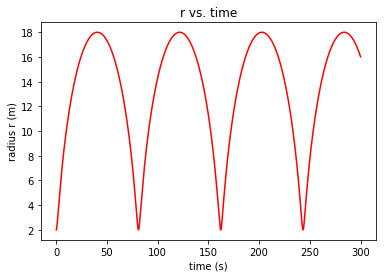

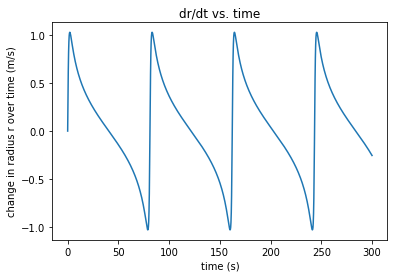

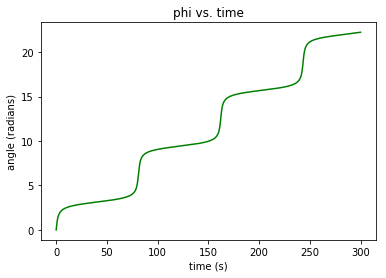

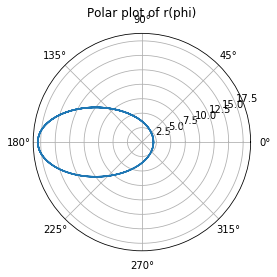

In [16]:
# Plots go here:
figure(1)
title("r vs. time")
plot(time, fSoln[:,0], "red")
xlabel("time (s)")
ylabel("radius r (m)")
# ylim(0, 5)

figure(2)
title("dr/dt vs. time")
plot(time, fSoln[:,1])
xlabel("time (s)")
ylabel("change in radius r over time (m/s)")
# ylim (-1, 1)

figure(3)
title("phi vs. time")
plot(time, fSoln[:,2], "green")
xlabel("time (s)")
ylabel("angle (radians)")

figure(4)
pyplot.polar(fSoln[:,2], fSoln[:,0])
title("Polar plot of r(phi)")

***Explain here why each of your plots above has the "expected" behavior.  Be as quantitative as possible:***  

The first graph appears to mirror an elliptical orbit, through a sequence of repeating parabolas.

In the second plot, we see a spike as the object passes the perihelion point and so the angular velocity reverses from -1 m/s to 1 m/s.

In the third plot, we see a continued increase of the angle phi, which keeps going past 2*pi

### Visualizing two-body orbits
#### Exercise 8.6
By performing an appropriate coordinate transformation, plot the orbits of **both** masses on the same set of polar axes. Assume that the center of mass is at rest at the origin. 

*Hint: python polar plot can't handle negative values for r so you'll have to come up with some other way to represent these values.

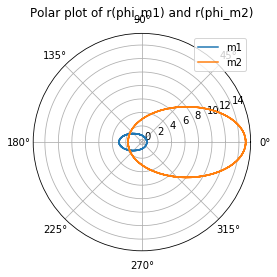

In [20]:
#Transform and Plot

#We used funky math from r_2 = -(m1/M)*r and the equation for r_1

figure()
pyplot.polar(fSoln[:,2], fSoln[:,0]*mu/m1, label="m1")
pyplot.polar(fSoln[:,2]+pi, fSoln[:,0]*mu/m2, label="m2")
title("Polar plot of r(phi_m1) and r(phi_m2)")
legend()

#### Exercise 8.7

It's much more revlealing to watch the **motion** of the two objects rather than just plotting their trajectories.  To do this, we will need to create a movie.  The cell below will walk you through this process.

In [28]:
%pylab
# get rid of inline plotting


# This creates an x-y grid for plotting and chooses appropriate x and y limits on your axes.
fig=figure()
ax = axes(xlim=[-4,16], ylim=[-10,10])
grid()

# This plots orbital trajectories in the x-y plane

# DO THIS!! 
# Recreate the same plot as above in Exercise 7.6 by 
# defining r_1, r_2, phi_1 and phi_2, if you haven't done so already.
# If you've already defined r_1, r_2, phi_1 and phi_2 then all you 
# should have to do is to run this cell.

r_1 = fSoln[:,0]*mu/m1
r_2 = fSoln[:,0]*mu/m2
phi_1 = fSoln[:,2]
phi_2 = fSoln[:,2]+pi

t1me = linspace(0, 300, 1000) #FIX

plt.plot(r_1*cos(phi_1),r_1*sin(phi_1), color='red') #Plots the orbit of mass 1
plt.plot(r_2*cos(phi_2),r_2*sin(phi_2), color='blue') #Plots the orbit of mass 2

#We need to determine how long to run the movie for (the number of frames, num_frames) 
#
#To do this, first find the period from Kepler's III law (Eq 8.54 with modification)
ecc = 0.8
period = 2*pi*ang_mom**3/(G_grav*m1*m2)**2*(m1 + m2)/(m1*m2)/(1 - ecc**2)**1.5 

timePerFrame = 1.0 #Each frame corresponds to a timestep of 1
dStep = max(t1me)/size(t1me) #The integrator timestep size
stepsPerFrame = timePerFrame/dStep  #Determine how many of the integrator steps per frame
num_frames = int(period/timePerFrame)

# initialize plotting of the positions of m1 and m2
# also plot the position of the center of mass
m1_position,= ax.plot([],[], 'ro', ms=6)
m2_position,= ax.plot([],[], 'bo', ms=6)
com_position = ax.plot(0,0, 'g*', ms=10)

# FuncAnimation requires an initialization function.  This just
# lets FuncAnimation know that this line reference is the one to use
# The function does no plotting since set_data is empty.
def init():
    m1_position.set_data([], [])
    m2_position.set_data([], [])
    return m1_position, m2_position

# function used in the FuncAnimation
def animate(i):
    # This makes the plot, by moving data into lines's set_data method
    
    j=i*int(stepsPerFrame)
    
    m1_position.set_data(r_1[j]*cos(phi_1[j]),r_1[j]*sin(phi_1[j])) 
    m2_position.set_data(r_2[j]*cos(phi_2[j]),r_2[j]*sin(phi_2[j])) 
    
    return m1_position, m2_position

# for blit True, plot only changes from previous plot to speed up plot calls
# blit must be False on osx (changing the backend will also work, but this is easier)
# use non-inline plots for animation on osx
anim= animation.FuncAnimation(fig, animate, init_func=init, frames=num_frames, blit=False)


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


## Hyperbolic Orbits
### Exercise 8.8
Repeat your work from exercise 8.5 -- 8.6 to solve for and plot a hyperbolic orbit with an eccentricity of 1.2 (and all the other parameters the same) for 0 < t < 10. 

Populating the interactive namespace from numpy and matplotlib


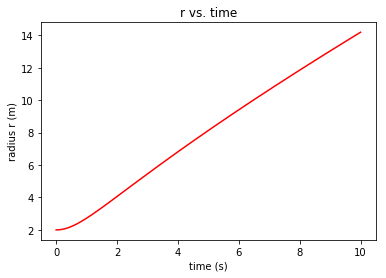

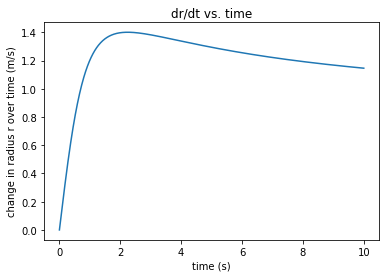

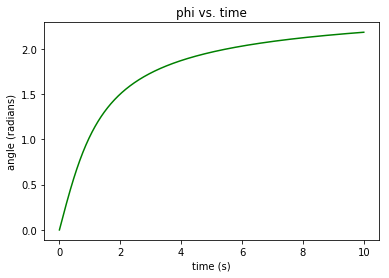

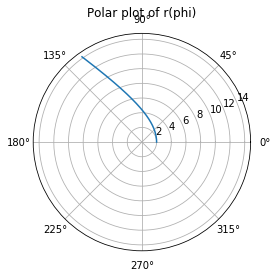

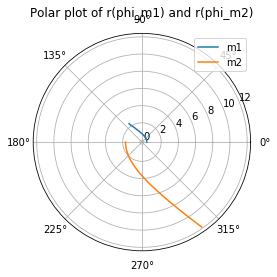

In [29]:
# bring back inline plotting
%pylab inline

# Initial conditions
G_grav = 1 #FIX
r0 = 2. #FIX
phi0 = 0. #FIX
m1 = 5. #FIX
m2 = 1. #FIX
eccentricity = 1.2
r_min = 2.0

mu = (m1*m2)/(m1+m2) #FIX #Reduced mass
gamma_g = G_grav*m1*m2 #FIX #This is simply G*m1*m2. This combination would appear frequently in this lab.
ang_mom = sqrt(gamma_g*r_min*mu*(1+eccentricity)) #FIX #Angular momentum. You should write this in terms of mu, G_grav, r0, m1, and m2.
drdt0 = 0. #FIX

# Integration of equations of motion 
time = linspace(0, 10, 1000) #FIX
fInit = array([r0, drdt0, phi0]) #FIX
param = array([mu, ang_mom, gamma_g]) #FIX
fSoln = odeint(deriv, fInit, time, args=(param,))

# Plots of r vs t, v_r vs t, phi vs t and the orbit (in a polar plot)
figure(1)
title("r vs. time")
plot(time, fSoln[:,0], "red")
xlabel("time (s)")
ylabel("radius r (m)")
# ylim(0, 5)

figure(2)
title("dr/dt vs. time")
plot(time, fSoln[:,1])
xlabel("time (s)")
ylabel("change in radius r over time (m/s)")
# ylim (-1, 1)

figure(3)
title("phi vs. time")
plot(time, fSoln[:,2], "green")
xlabel("time (s)")
ylabel("angle (radians)")

figure(4)
pyplot.polar(fSoln[:,2], fSoln[:,0])
title("Polar plot of r(phi)")

#Transform and Plot
figure()
pyplot.polar(fSoln[:,2], fSoln[:,0]*mu/m1, label="m1")
pyplot.polar(fSoln[:,2]+pi, fSoln[:,0]*mu/m2, label="m2")
title("Polar plot of r(phi_m1) and r(phi_m2)")
legend()


## Non-Keplerian Orbits:

A gravitational force law that deviates from $~1/r^{2}$ will not produce Keplerian orbits (defined here as orbits  
that trace the shape of a conic section).  It is also impossible to solve analytically, so it must be approached computationally.

#### Exercise 8.9
To explore the shapes of a non-Keplerian orbit, you will complete the same set of steps that you have already completed in this lab, but for a force law that scales as $1/r^{5/2}$.  

Use the set of initial conditions given in the cell below, and then:  
(a) Define the correct derivative function for this force law.  Call it something different, like deriv_nonkep.
(b) Plot $r(t)$, $dr/dt(t)$, and $\phi(t)$.  
(c) Plot the orbital trajectory of the reduced mass on a set of polar axes. 

Perform your integration from t=0 to t=40 with 100,000 time steps, and check your final plots with an instructor.

In [30]:
 %pylab inline
# bring back inline plotting

# Initial conditions and constants

G_grav = 1.
mu = 1.
gamma_g = 1.
ang_mom = 1.
phi0 = 0.
r0 = 0.6671
drdt0 = 0. 


Populating the interactive namespace from numpy and matplotlib


In [43]:
# Define derivatives and integrate equations of motion

def deriv_nonkep(f,t,param): # return derivatives of the array f[r,r',phi]
    # Unpack parameters
    mu_deriv = param[0]
    ang_mom_deriv = param[1]
    gamma_g_deriv = param[2]
    
    # Function values:
    r = f[0] #FIX
    drdt = f[1] #FIX
    phi = f[2] #FIX
    
    # Derivative definitions:
    dphidt = ang_mom_deriv/(mu_deriv*r**(5/2)) #FIX
    d2rdt2 = r*dphidt**(2) - gamma_g_deriv/(mu_deriv*r**(5/2)) #FIX
    
    return [drdt, d2rdt2, dphidt]

time = linspace(0, 500, 1000) #FIX
fInit = array([r0, drdt0, phi0]) #FIX
param = array([mu, ang_mom, gamma_g]) #FIX
fSoln = odeint(deriv_nonkep, fInit, time, args=(param,))

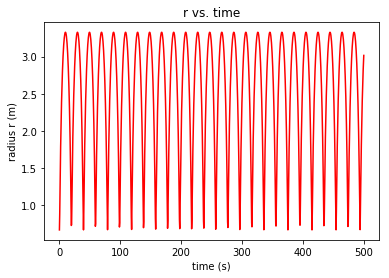

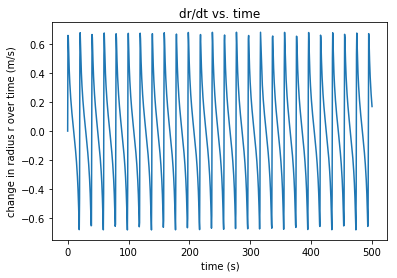

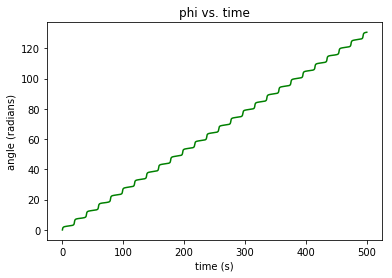

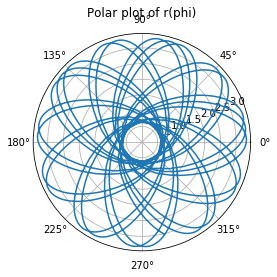

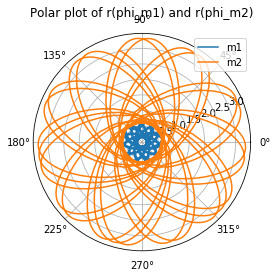

In [44]:
# Plots
figure(1)
title("r vs. time")
plot(time, fSoln[:,0], "red")
xlabel("time (s)")
ylabel("radius r (m)")
# ylim(0, 5)

figure(2)
title("dr/dt vs. time")
plot(time, fSoln[:,1])
xlabel("time (s)")
ylabel("change in radius r over time (m/s)")
# ylim (-1, 1)

figure(3)
title("phi vs. time")
plot(time, fSoln[:,2], "green")
xlabel("time (s)")
ylabel("angle (radians)")

figure(4)
pyplot.polar(fSoln[:,2], fSoln[:,0])
title("Polar plot of r(phi)")

#Transform and Plot
figure()
pyplot.polar(fSoln[:,2], fSoln[:,0]*mu/m1, label="m1")
pyplot.polar(fSoln[:,2]+pi, fSoln[:,0]*mu/m2, label="m2")
title("Polar plot of r(phi_m1) and r(phi_m2)")
legend()

## Check-out
#### Exercise 8.10

Briefly summarize in the cell below the ideas in today's lab.

We learned about Keplerian two-body orbits in more clarity and found both analytical and computational solutions to the problem. We also looked at how eccentricity plays a role in elliptical orbits and hyperbolic orbits, and found some flower-looking (and precession of Mercury-like) non-Keplerian orbits. We also learned how to plot in Polar coordinates.

## Challenge Problems

Complete the following exercises if you have extra time once you have completed the rest of the lab.

* Confirm conservation of mechanical energy for your Keplerian orbits (both circular and eccentric)
* Play around with some other configurations of Keplerian orbits.  Try systematically changing both the masses and the orbital eccentricity.  
* Confirm Kepler's 3rd law for your Keplerian orbits
